# Customer Churn Prediction

This is the first notebook for now, we will create smaller subnotebooks later. We are working with the dataset from https://www.kaggle.com/blastchar/telco-customer-churn. 

## Import libaries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# import statsmodels.api as sm
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
import sklearn

C:\Users\Korisnik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Korisnik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Korisnik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Korisnik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

In [2]:
CHURN_PATH = "../data/"

data_path = CHURN_PATH + "customerChurnTelco.csv"

df = pd.read_csv(data_path)

**Preview of the data**

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Variables description

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


It seems that we should convert variable **TotalCharges** from Object into float64.

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


**We can see total 21 variables and each varaible has 7043 observations.**

- Description of the variables:

    1. **customerID** is a unique identifying code assigned to each customer 
    
    2. **gender** indicates the sex of the custormer - Male or female
    
    3. **SeniorCitizen** indicates whether the customer is a senior citizen or not (1, 0)
    
    4. **Partner** indicates whether the customer has a partner or not (Yes, No)
    
    5. **Dependents** indicates whether the customer has dependents or not (Yes, No)

    6. **tenure** is the number of months the customer stayed with the company
    
    7. **PhoneService** indicates whether the customer has a phone service or not (Yes, No)
    
    8. **MultipleLines** indicates whether the customer has multiple lines or not (Yes, No, No phone service)
    
    9. **InternetService** indicates customer's internet service provider (DSL, Fiber optic, No)
    
    10. **OnlineSecurity** indicates whether the customer has online security or not (Yes, No, No internet service)
    
    11. **OnlineBackup** indicates whether the customer has online backup or not (Yes, No, No internet service)
    
    12. **DeviceProtection** indicates whether the customer has device protection or not (Yes, No, No internet service)
    
    13. **TechSupport** indicates whether the customer has tech support or not (Yes, No, No internet service)
    
    14. **StreamingTV** indicates whether the customer has streaming TV or not (Yes, No, No internet service)
    
    15. **StreamingMovies** indicates whether the customer has streaming movies or not (Yes, No, No internet service)
    
    16. **Contract** indicates the contract term of the customer (Month-to-month, One year, Two year)
    
    17. **PaperlessBilling** indicates whether the customer has paperless billing or not (Yes, No)
    
    18. **PaymentMethod** indicates the customer's  payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    
    19. **MonthlyCharges** is the customer's amount of monthly charges
    
    20. **TotalCharges** is the amount charged to the customer totally
    
    21. **Churn** indicates whether the customer churned or not (Yes or No)
    
**Here, we have that Churn is the target variable and rest of the variables are predictor variables.**

### Categorical and Numerical Variables

In [8]:
display(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

**Categorical Variable:**  gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn, customerID.

**Numerical Variable**: tenure, MonthlyCharges, TotalCharges.

**Let us check whether any of the features contains  blank, null or empty values**

In [9]:
display(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We observe that just **TotalCharges** contains null values.

Lazar's suggestion of the preprocessing:

1.  Univariate analysis of the fatures 
2.  Feature engineering:  modify or create new features from the exsisting features which are otherwise hard to analyse in their raw forms that we saw in Univariate Analysis section
3. Outliers detection and Imputing missing variables
4. Bivaraite and Multivariate analysis
5. Data Transfromation -  categorical variables will be encoded into numerical variables, maybe some categorization or maybe normalization and standardization of our continuous variables and redundant and useless features will be dropped

## Univariate analysis

We are going to explore the distribution and central tendency of the values of each variable separately in the data set. For numerical variables, we are going to use histogram to explore their shape of distribution, while for categorical varaibles we are going to use bar plots and pie charts to picture the absolute and relative frequency distribution.

### Numerical variables

In [10]:
def showSummary(variable):
    stats = variable.describe()
    skewness = pd.Series(variable.skew(), index=["skewness"])
    stats = pd.DataFrame(pd.concat([skewness, stats]), columns=[variable.name]).reset_index().rename(
        columns={"index":"Summary stats"})

    return display(stats.round(2))

**Tenure**

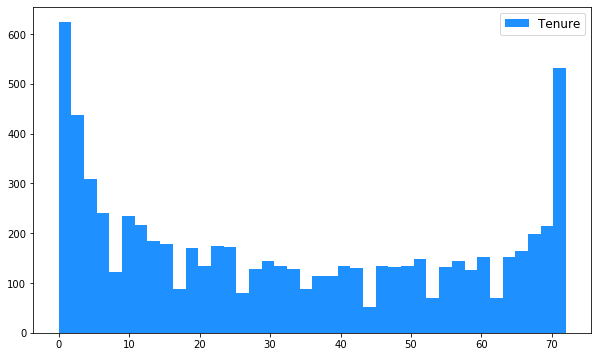

In [11]:
ax = df["tenure"].hist(bins=40, color="DodgerBlue", label="Tenure", figsize=(10, 6), grid=False)
ax.legend(fontsize=12);

In [12]:
showSummary(df["tenure"])

,Summary stats,tenure
0,skewness,0.24
1,count,7043.00
2,mean,32.37
3,std,24.56
4,min,0.00
5,25%,9.00
6,50%,29.00
7,75%,55.00
8,max,72.00


Plot shows that distribution of values of variable **tenure** is almost symmetric where we have mass of the distribution heavily concentrated on the left and on the right side. This is confirmed by the value of `skewness=0.24`

**MonthlyCharges**

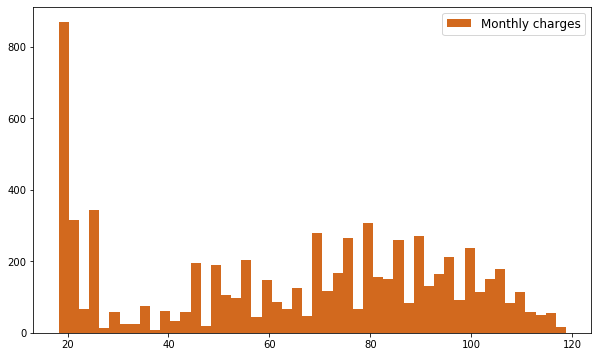

In [13]:
ax = df["MonthlyCharges"].hist(bins=50, color="chocolate", label="Monthly charges", figsize=(10, 6), grid=False)
ax.legend(fontsize=12);

In [14]:
showSummary(df["MonthlyCharges"])

,Summary stats,MonthlyCharges
0,skewness,-0.22
1,count,7043.00
2,mean,64.76
3,std,30.09
4,min,18.25
5,25%,35.50
6,50%,70.35
7,75%,89.85
8,max,118.75


Comments?

**TotalCharges**

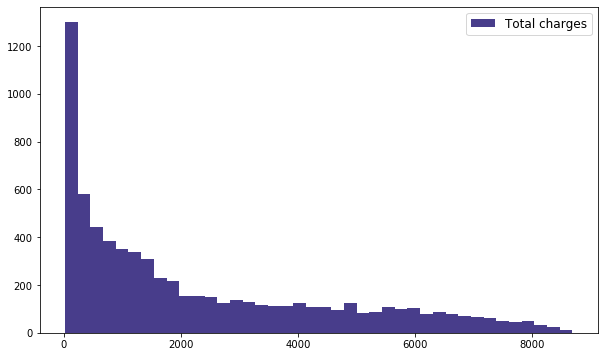

In [15]:
ax = df["TotalCharges"].hist(bins=40, color="DarkSlateBlue", label="Total charges", figsize=(10, 6), grid=False)
ax.legend(fontsize=12);

In [16]:
showSummary(df["TotalCharges"])

,Summary stats,TotalCharges
0,skewness,0.96
1,count,7032.00
2,mean,2283.30
3,std,2266.77
4,min,18.80
5,25%,401.45
6,50%,1397.48
7,75%,3794.74
8,max,8684.80


Histogram shows that the  mass of the distribution of **TotalCharges** is concentrated on the left of the figure due to very long tail on the right side. We can say that **TotalCharges** is moderately  skewed(positively) which is also supported by the value of skewness of 0.96.

### Categorical Variables

In [17]:
def plotFrequency(variable):
    absFreq = df[variable].value_counts()
    colors = ['SteelBlue', 'DarkOrange', 'DarkCyan', 'Chocolate']
    
    fig = plt.figure(figsize=(10, 5))    
    plt.barh(absFreq.index, absFreq, color=colors)
    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.ylabel(variable, fontsize=15)
    plt.title("Absolute frequncy", fontsize=15)
    plt.show()
    
    fig = plt.figure(figsize=(6, 6))
    plt.pie(absFreq, labels=absFreq.index, textprops={"fontsize":14}, autopct="%0.2f%%", 
            colors=colors)
    plt.title("Relative frequency", fontsize=15)
    plt.show()

**Churn**

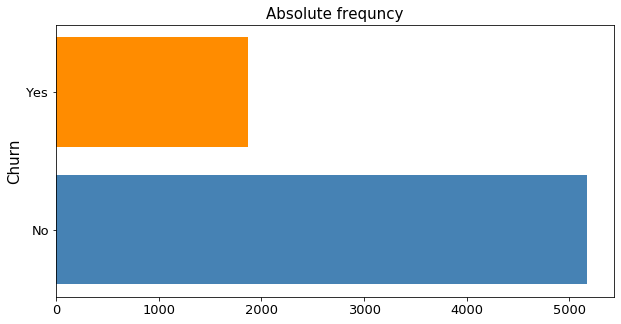

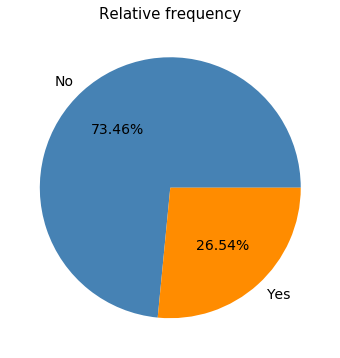

In [18]:
plotFrequency("Churn");

Comments?

**Gender**

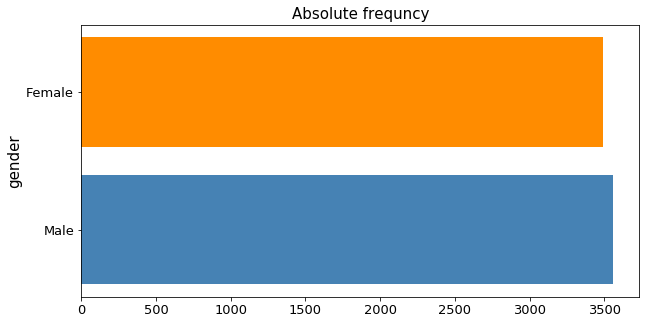

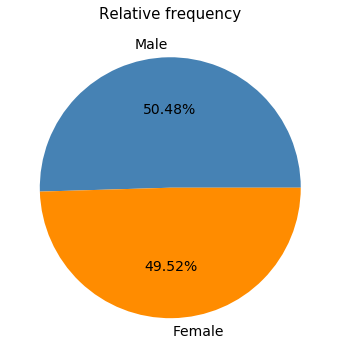

In [19]:
plotFrequency("gender")

Comments?

**SeniorCitizen**

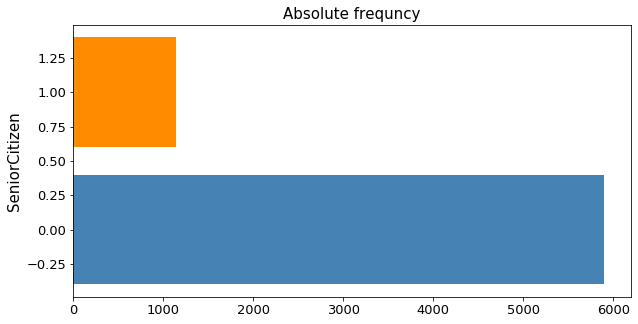

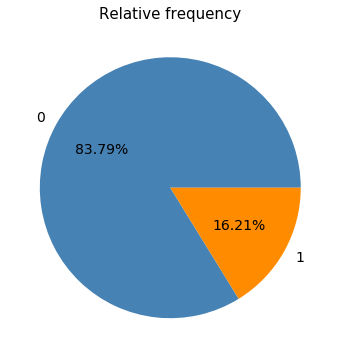

In [20]:
plotFrequency("SeniorCitizen")

Comments?

**Partner**

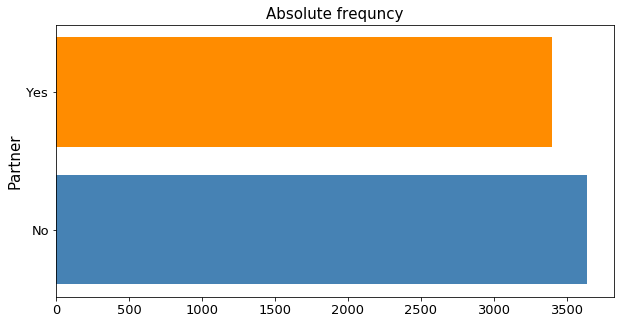

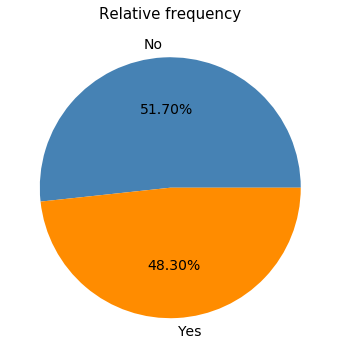

In [21]:
plotFrequency("Partner")

Comments?

**Dependents**

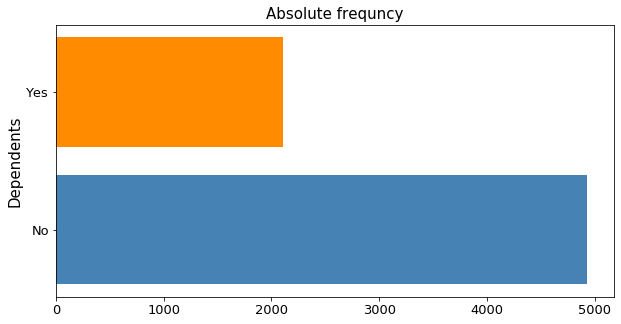

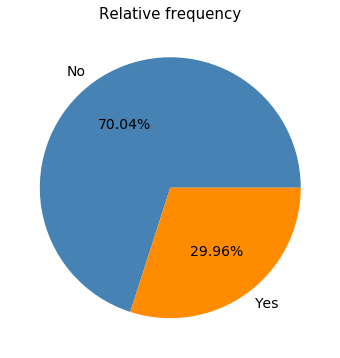

In [22]:
plotFrequency("Dependents")

Comment?

**PhoneService**

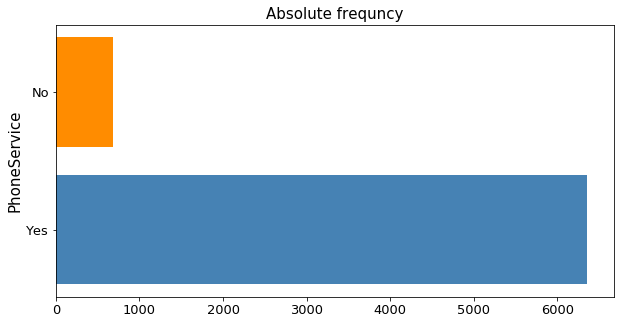

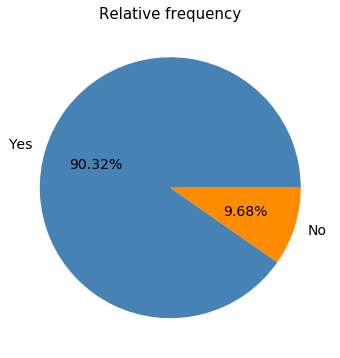

In [23]:
plotFrequency("PhoneService")

Comments?

**MultipleLines**

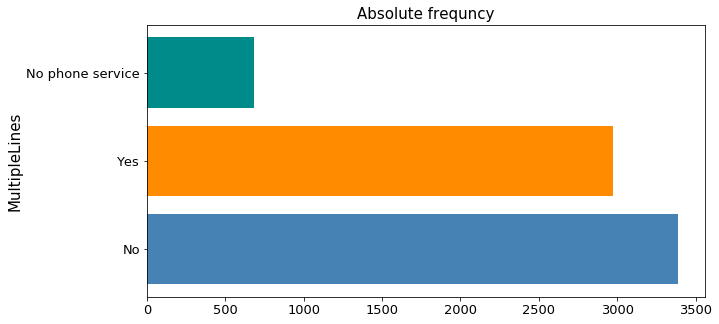

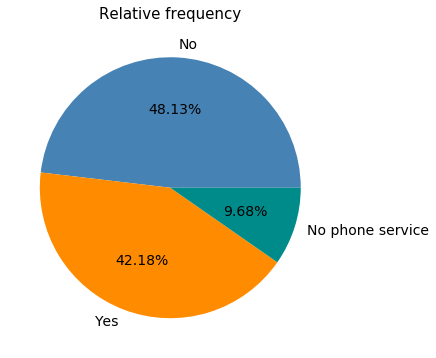

In [24]:
plotFrequency("MultipleLines")

Comments?

**InternetService**

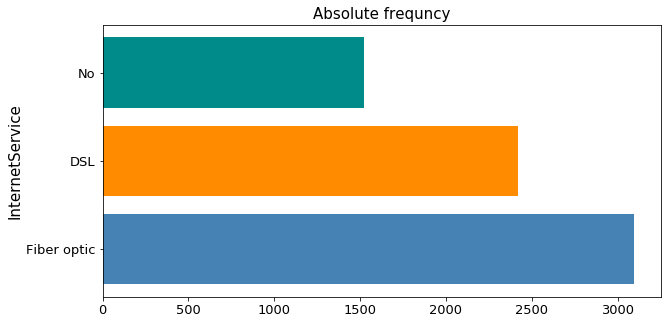

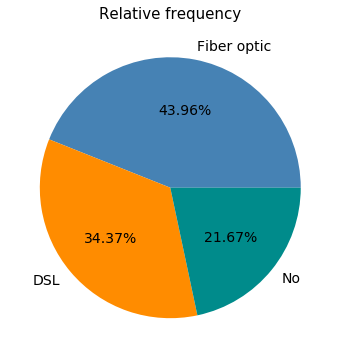

In [25]:
plotFrequency("InternetService")

Comments?

**OnlineSecurity**

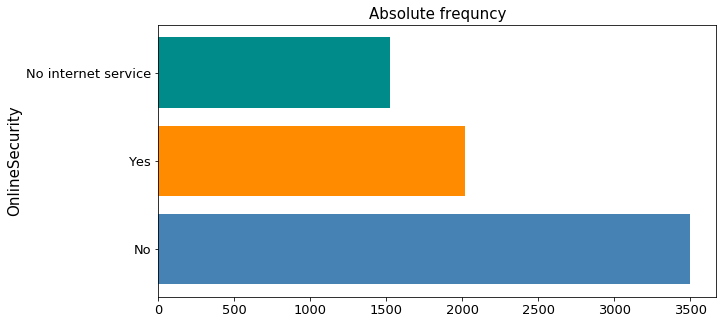

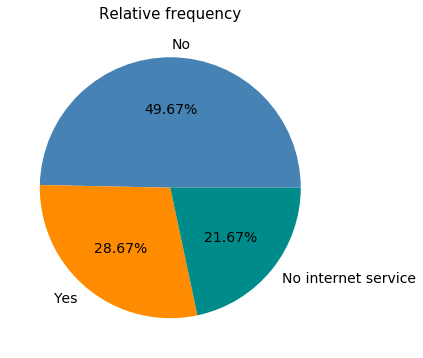

In [26]:
plotFrequency("OnlineSecurity")

Comment?

**OnlineBackup**

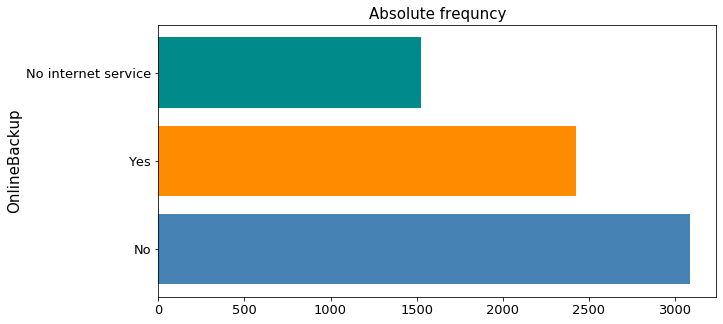

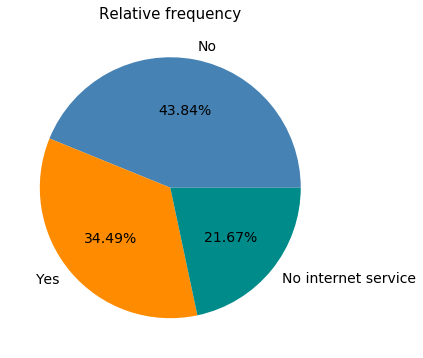

In [27]:
plotFrequency('OnlineBackup')

Comments?

**DeviceProtection**

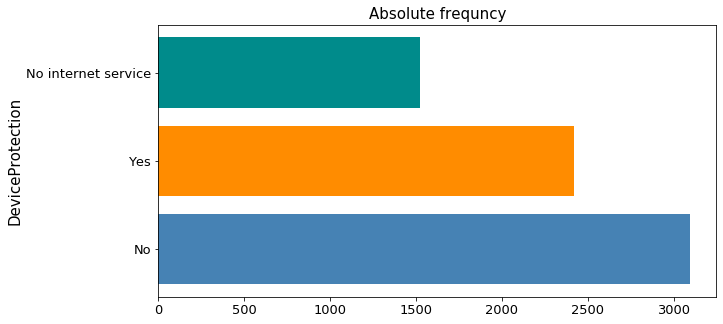

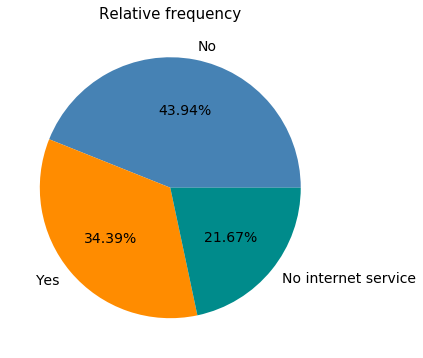

In [28]:
plotFrequency("DeviceProtection")

Comments?

**TechSupport**

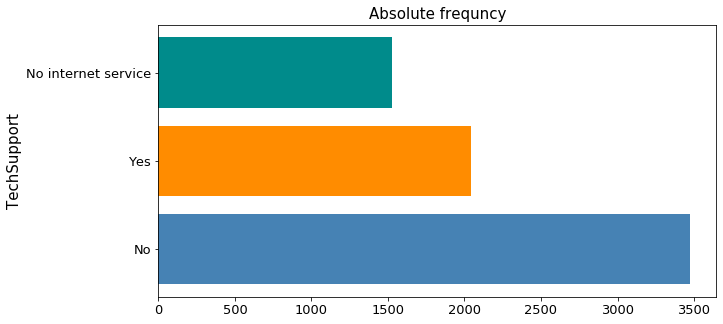

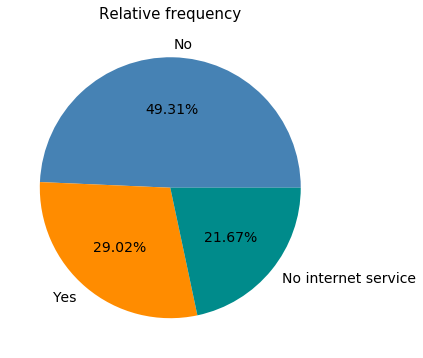

In [29]:
plotFrequency('TechSupport')

Comments?

**StreamingTV**

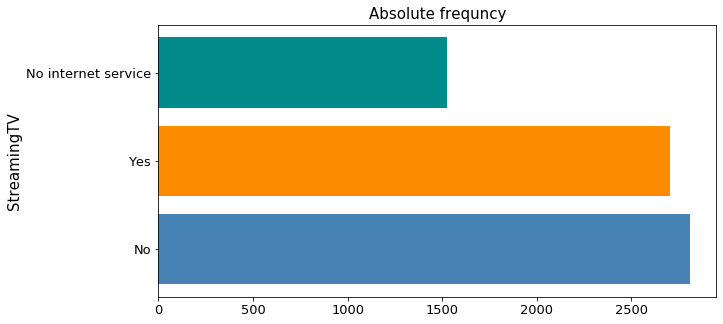

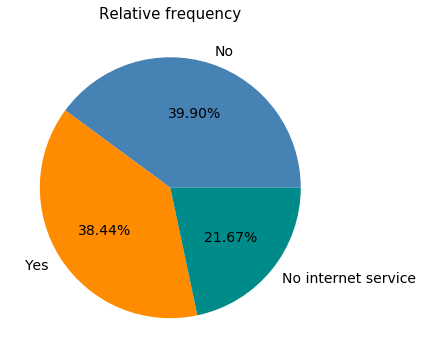

In [30]:
plotFrequency("StreamingTV")

Comments?

**StreamingMovies**

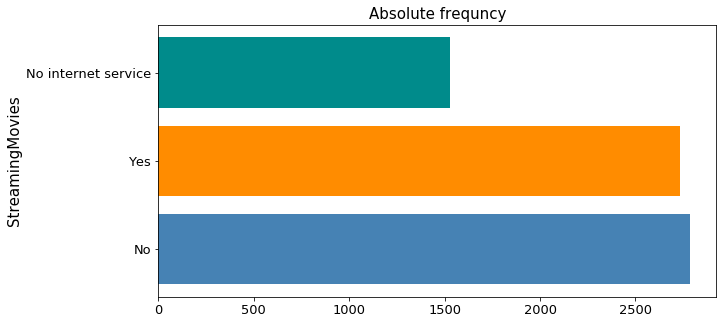

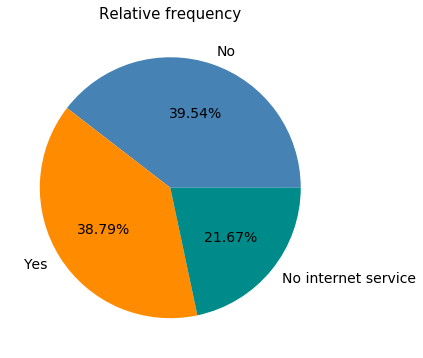

In [31]:
plotFrequency("StreamingMovies")

Comments?

**Contract**

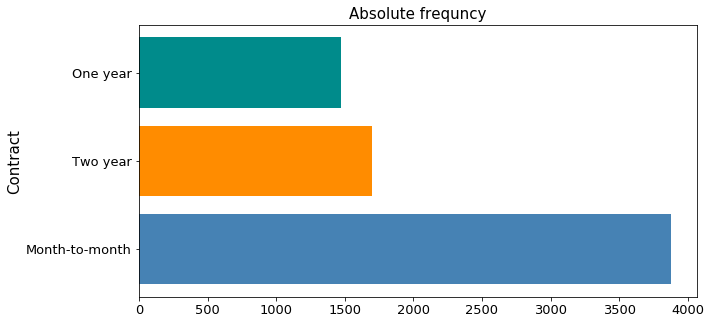

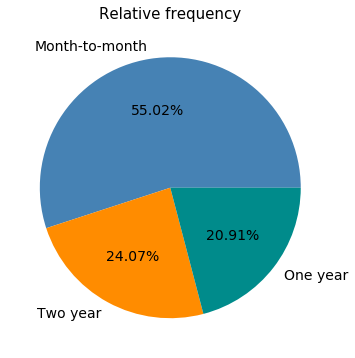

In [32]:
plotFrequency("Contract")

Comments?

**PaperlessBilling**

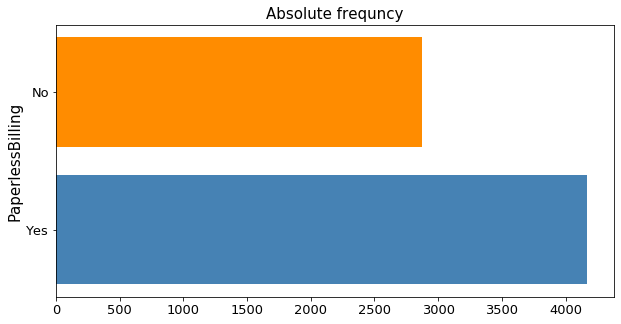

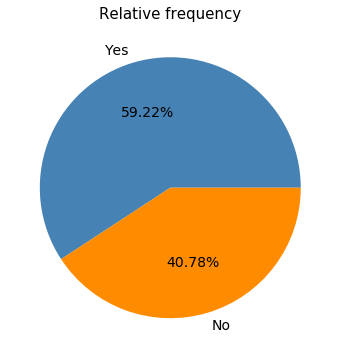

In [33]:
plotFrequency("PaperlessBilling")

Comments?

**PaymentMethod**

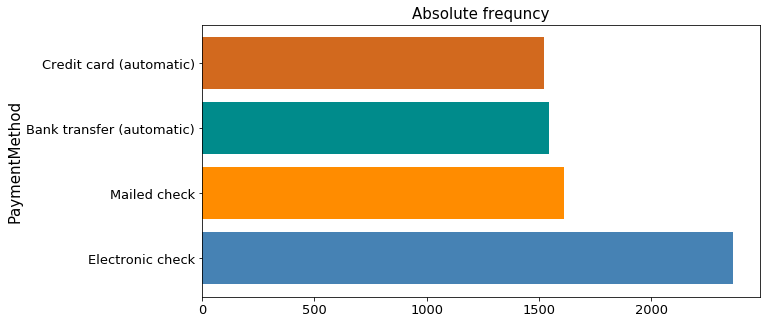

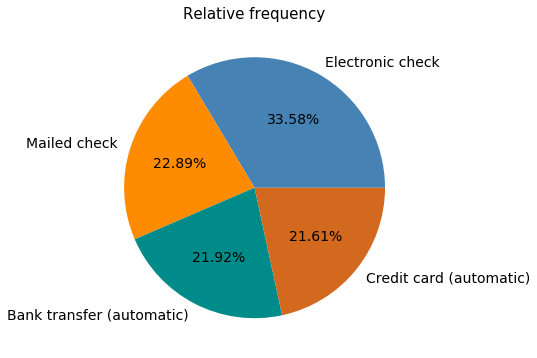

In [34]:
plotFrequency("PaymentMethod")

Comments?

**customerID**

In [35]:
"""What does customerID contain?"""
display(df.customerID.head())

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
Name: customerID, dtype: object

**customerID** is an alphanumeric code which uniqely indetifies a customer which was assigned to.

## Feature Engineering

Now, we would either modify or create new variables from the exsisting ones which are otherwise hard or redundant to analyse in their raw forms. 

We would like to engineer features like MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies that could help us more to classify churning among the customers once they are processed. 

### Simplify categorization for phone services

We have variable **PhoneService** describes who of the customers use a phone service and who does not, so it could be redundant to have this category in **MultipleLines**. We can say that people who do not use phone service, they do not have multiple lines and thus, we can simplify categorization of this feature.

In [36]:
multipleLines = df["MultipleLines"].copy()
multipleLines.replace({"No phone service":"No"}, inplace=True, regex=True)
df["MultipleLinesProcessed"] = multipleLines

In [37]:
display(df.loc[:, "MultipleLinesProcessed"].value_counts())

No     4072
Yes    2971
Name: MultipleLinesProcessed, dtype: int64

### Simplify categorization for internet services

Similarly, as for the phone services, feature **InternetService** describes internet service users, so it is redundant that we have category of people who do not have an internet service in all internet service related variables. Thus, we simplify categorization for those variables. 

In [38]:
for variable in ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", 
                 "StreamingTV", "StreamingMovies"]:
    variableProcessed = df[variable].copy()
    variableProcessed.replace({"No internet service":"No"}, inplace=True, regex=True)
    df[variable + "Processed"] = variableProcessed

In [39]:
df.loc[:, ["OnlineSecurityProcessed", "OnlineBackupProcessed", "DeviceProtectionProcessed", "TechSupportProcessed", 
                 "StreamingTVProcessed", "StreamingMoviesProcessed"]].apply(pd.Series.value_counts)

,OnlineSecurityProcessed,OnlineBackupProcessed,DeviceProtectionProcessed,TechSupportProcessed,StreamingTVProcessed,StreamingMoviesProcessed
No,5024,4614,4621,4999,4336,4311
Yes,2019,2429,2422,2044,2707,2732


### Process StreamingTV and StreamingMovies

In univariate analysis we could see that distributions of **StreamingTV** and **StreamingMovies** is very similar and in addition we have that these two variables together indicate users of streaming platforms, thus, we could create new variable `Streaming` from these two.

In [40]:
df['Streaming'] = (df['StreamingTVProcessed'] == 'Yes').astype(int) + (df['StreamingMoviesProcessed'] == 
                                                                       'Yes').astype(int)
display(df['Streaming'].value_counts())

0    3544
2    1940
1    1559
Name: Streaming, dtype: int64

### Process OnlineSecurity and OnlineBackup 

These two variables together could indicate online support, thus we could put them together and create a new feature `OnlineSupport`.

In [41]:
df['OnlineSupport'] = (df['OnlineSecurityProcessed'] == 'Yes').astype(int) + (df['OnlineBackupProcessed'] == 
                                                                       'Yes').astype(int)
display(df['OnlineSupport'].value_counts())

0    3721
1    2196
2    1126
Name: OnlineSupport, dtype: int64

### Process Churn

To ease some later compuations and so we can apply certain statistical functions, we will change category `No` for `0` and `Yes` for `1`.

In [42]:
df["Churn"].replace({"No": 0, "Yes": 1}, inplace=True)
display(df["Churn"].value_counts())

0    5174
1    1869
Name: Churn, dtype: int64

## Outliers detection

We would like to identify potential outliers in our dataset using box plots and fill missing values in our numerical variables.

In [43]:
def plotBox(variable):
    fig, axes = plt.subplots(figsize=(9, 3))
    axes = sns.boxplot(x=df[variable], orient="h", ax=axes, whis=1.5, width= 0.6)
    plt.title(variable + ' distribution', fontsize=14)
    plt.xlabel('')
    plt.show()

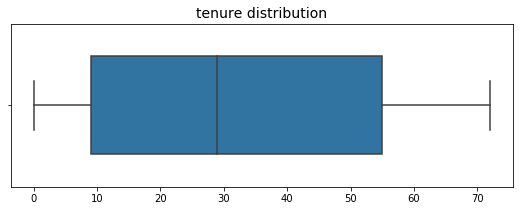

In [44]:
plotBox('tenure')

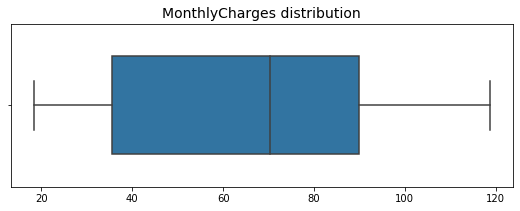

In [45]:
plotBox('MonthlyCharges')

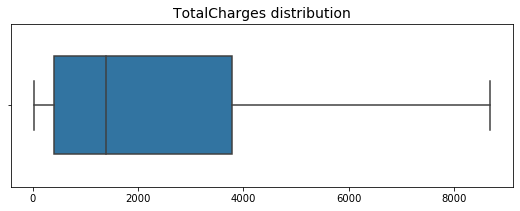

In [46]:
plotBox('TotalCharges')

We can see from the plots above that no outliers have been detected among numerical variables.

## Imputing Missing Values

We have seen earlier that dataset misses values just for the variable `TotalCharges`, thus instead of deleting those observations from the dataset we would like to imput the missing values.

The simplest way to input missing values of some variable is to imput its missing values with its mean, median, or mode. What we will input depends on the type of the variable and its distribution. Since our variable with missing values is numerical and its distribution is moderately skewed (altough without outliers), we are going to fill null values with median.

In [47]:
df['TotalCharges'].fillna(value=df['TotalCharges'].median(), inplace=True)

In [48]:
display(df.isnull().sum())

customerID                   0
gender                       0
SeniorCitizen                0
Partner                      0
Dependents                   0
tenure                       0
PhoneService                 0
MultipleLines                0
InternetService              0
OnlineSecurity               0
OnlineBackup                 0
DeviceProtection             0
TechSupport                  0
StreamingTV                  0
StreamingMovies              0
Contract                     0
PaperlessBilling             0
PaymentMethod                0
MonthlyCharges               0
TotalCharges                 0
Churn                        0
MultipleLinesProcessed       0
OnlineSecurityProcessed      0
OnlineBackupProcessed        0
DeviceProtectionProcessed    0
TechSupportProcessed         0
StreamingTVProcessed         0
StreamingMoviesProcessed     0
Streaming                    0
OnlineSupport                0
dtype: int64

As we can see now, we do not have any variables with missing values in our dataset.

## Bivariate analysis

At this part, we would like to find the relationship between two variables, to be more specific, we will look for the correlation between target and predictor variables. Since our target, `churn`, is a categorical variable, we will do bivariate analysis between categorical and numerical variables and between categorical and categorical variables.

Hence, we will apply to different methods to perform bivariate analysis and find correlation between variables:
    
   1. Numerical and Categorical variables: Point-Biserial correlation (which we can apply since our target is of binary type)
    
   2. Categorical and Categorical variables: Chi-square test 

### Numerical and Categorical variables

In [49]:
def boxPlot(numerical, categorical="Churn"):
    fig, axes = plt.subplots(figsize=(5, 6))
    axes = sns.boxplot(x=categorical, y=numerical, data=df[[categorical, numerical]], orient="v", width=0.6 ,ax=axes)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.xlabel(categorical, fontsize=14)
    plt.ylabel(numerical, fontsize=14)
    
    # Point-Biserial correlation
    corr, p_val = stats.pointbiserialr(df[numerical], df[categorical])
    corr = corr.round(2)
    p_val = p_val.round(4)
    
    plt.title("Correlation between " + numerical +" and " + categorical + ": corr = " + str(corr) + 
              " and p-value = " + str(p_val), fontsize=14)
    plt.show()
    
def plotHistogram(numerical, categorical="Churn", bins=40):
    ax = df.loc[df[categorical] == 0, numerical].hist(bins=bins, color="blue", alpha=0.5, label="Stay", 
                                                        figsize=(10, 6), grid=False)
    df.loc[df[categorical] == 1, numerical].hist(bins=bins, color="red", ax=ax, alpha=0.5, label="Churn", grid=False)
    ax.legend(fontsize=12);
    
def plotMeans(numerical, categorical="Churn"):
    means = df[numerical].groupby(df[categorical]).mean()
    
    fig = plt.figure(figsize=(6, 4))    
    plt.bar(means.index, means, color=['SteelBlue', 'DarkOrange', 'DarkCyan'])
    plt.xticks(np.arange(0, len(means.index)))
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.ylabel("Mean of " + numerical , fontsize=14)
    plt.xlabel(categorical, fontsize=14)
    plt.title("Mean of " + numerical + " w.r.t " + categorical, fontsize=14)
    plt.show()

**Tenure and Churn**

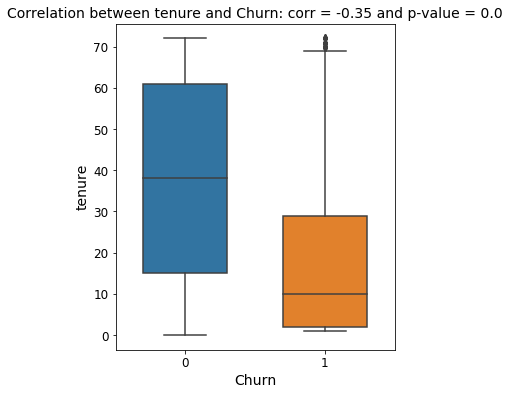

In [50]:
boxPlot("tenure")

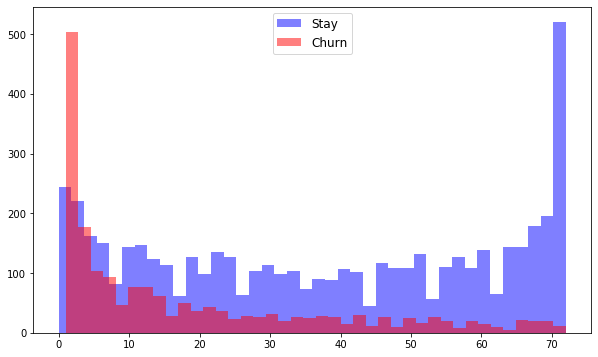

In [51]:
plotHistogram("tenure")

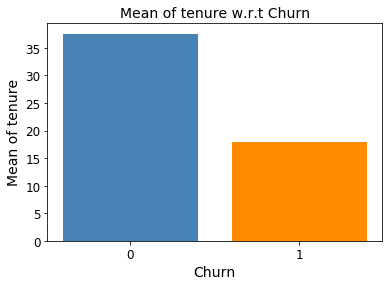

In [52]:
plotMeans("tenure")

**MonthlyCharges and Churn**

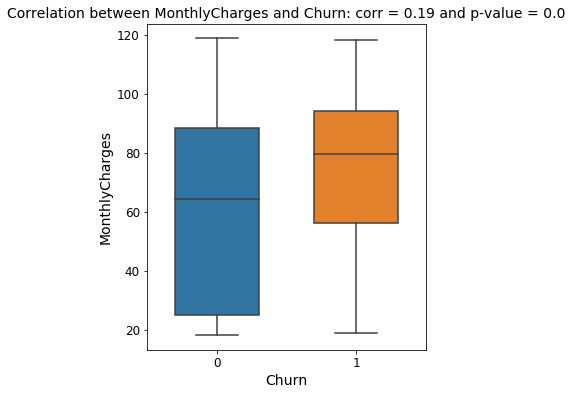

In [53]:
boxPlot("MonthlyCharges")

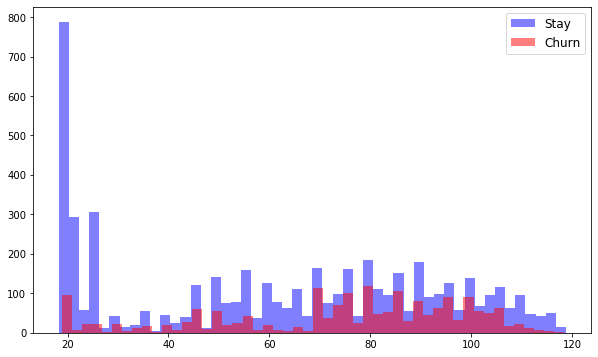

In [54]:
plotHistogram("MonthlyCharges", bins=50)

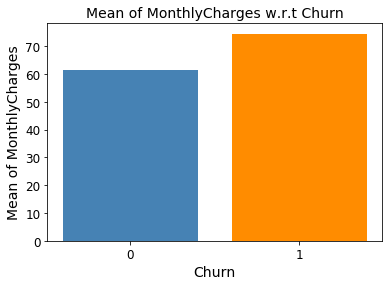

In [55]:
plotMeans("MonthlyCharges")

**TotalCharges and Churn**

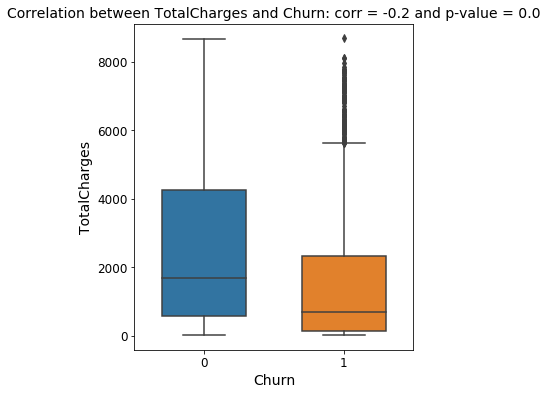

In [56]:
boxPlot("TotalCharges")

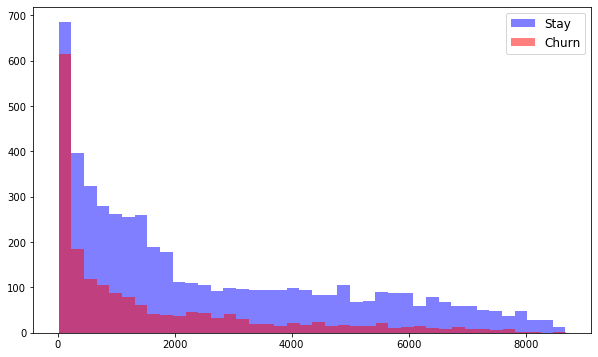

In [57]:
plotHistogram("TotalCharges")

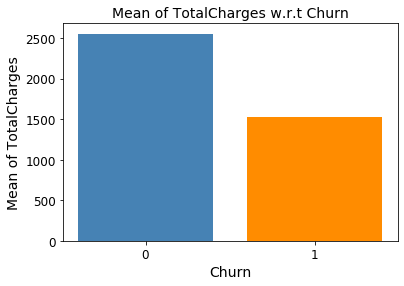

In [58]:
plotMeans("TotalCharges")

**MonthlyCharges and InternetService**

### Categorical and Categorical variables

In [59]:
def plotBar(categorical1, categorical2="Churn"):
    fig, axes = plt.subplots(figsize=(7, 6))
    axes = sns.countplot(x=categorical1, hue=categorical2, data=df, ax=axes)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.xlabel(categorical1, fontsize=14)
    plt.title("Absolute count of " + categorical2 + " by " + categorical1, fontsize=15)
    plt.legend(fontsize=13)
    
    fig, axes = plt.subplots(figsize=(7, 6))
    axes = sns.barplot(x=categorical1, y=categorical2, data=df, ax=axes)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.xlabel(categorical1, fontsize=14)
    plt.ylabel(categorical2 + " probability", fontsize=14)
    
def compute_chiSquare(categorical1, categorical2="Churn", prob=0.95):
    stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(
        index=df[categorical1], columns=df[categorical2]))
    print("Chi-Squared Test result between " + categorical1 + " and " + categorical2 + ": ", stat, p, dof, expected)
    
    critical = stats.chi2.ppf(prob, dof)
    if abs(stat) >= critical:
        print("Dependent (reject H0)")
    else:
        print("Independent (fail to reject H0)")
    
    alpha = 1 - prob
    if p <= alpha:
        print("Dependent (reject H0)")
    else:
        print("Independent (fail to reject H0)")
    
def Bonferroni_correction(categorical1, categorical2="Churn", prob=0.95):
    alpha = (1 - prob) / 3
    encoded = pd.get_dummies(df[categorical1])
    
    for column in encoded.columns:
        stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(
            index=encoded[column], columns=df[categorical2]))
        
        print("Bonferroni correction result between " + categorical1 + "(" + str(column) + ") and " + categorical2 
              + ":", stat, p, dof, expected)
        
        if p <= alpha:
            print("Dependent (reject H0)")
        else:
            print("Independent (fail to reject H0)")
        
        print()
    

**Gender and Churn**

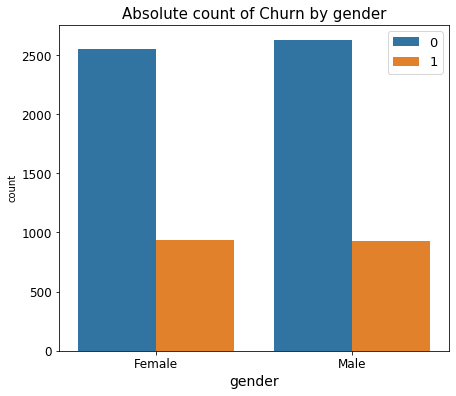

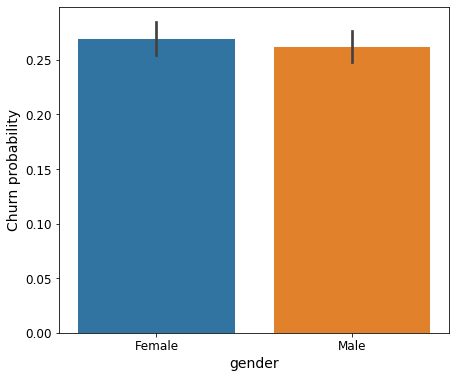

In [60]:
plotBar("gender")

In [61]:
compute_chiSquare("gender")

Chi-Squared Test result between gender and Churn:  0.4840828822091383 0.48657873605618596 1 [[2562.38989067  925.61010933]
 [2611.61010933  943.38989067]]
Independent (fail to reject H0)
Independent (fail to reject H0)


Test can be trusted and it seems that there is no correlation

**SeniorCitizen and Churn**

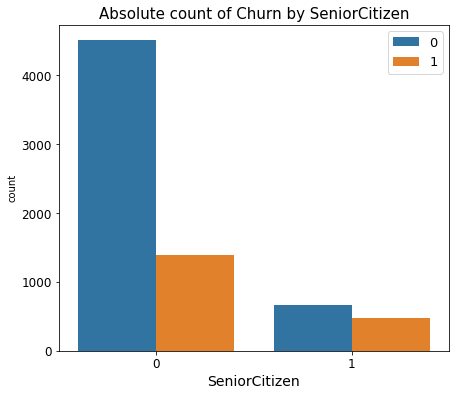

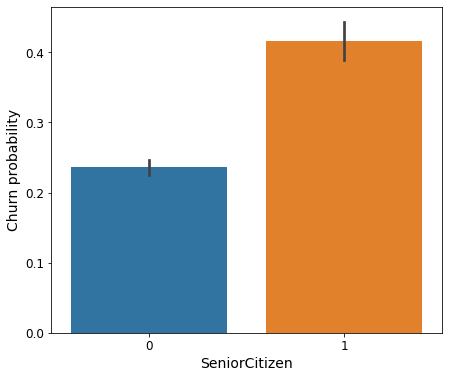

In [62]:
plotBar("SeniorCitizen")

In [63]:
compute_chiSquare("SeniorCitizen")

Chi-Squared Test result between SeniorCitizen and Churn:  159.42630036838742 1.510066805092378e-36 1 [[4335.05239245 1565.94760755]
 [ 838.94760755  303.05239245]]
Dependent (reject H0)
Dependent (reject H0)


**Partner and Churn**

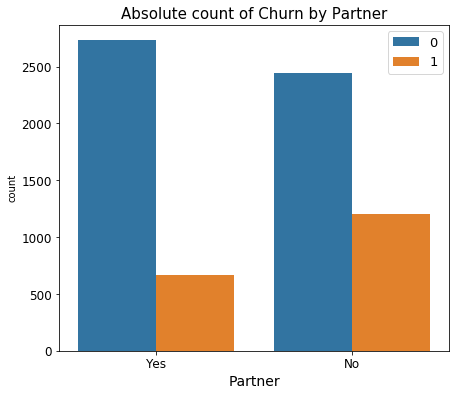

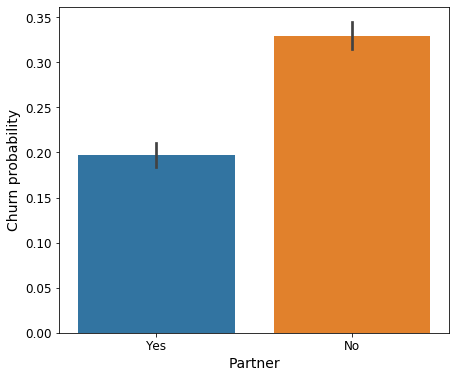

In [64]:
plotBar("Partner")

In [65]:
compute_chiSquare("Partner")

Chi-Squared Test result between Partner and Churn:  158.7333820309922 2.1399113440759935e-36 1 [[2674.78830044  966.21169956]
 [2499.21169956  902.78830044]]
Dependent (reject H0)
Dependent (reject H0)


**Dependents and Churn**

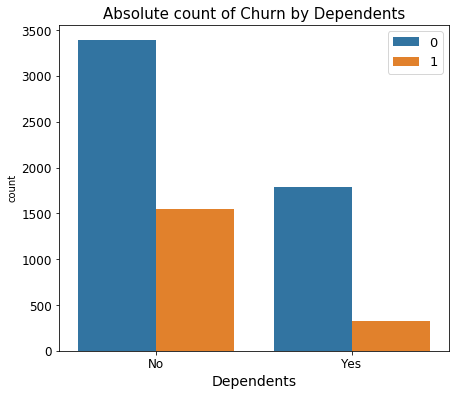

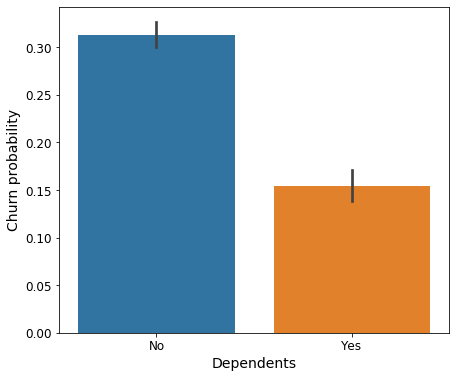

In [66]:
plotBar("Dependents")

In [67]:
compute_chiSquare("Dependents")

Chi-Squared Test result between Dependents and Churn:  189.12924940423474 4.9249216612154196e-43 1 [[3623.93042737 1309.06957263]
 [1550.06957263  559.93042737]]
Dependent (reject H0)
Dependent (reject H0)


**PhoneService and Churn**

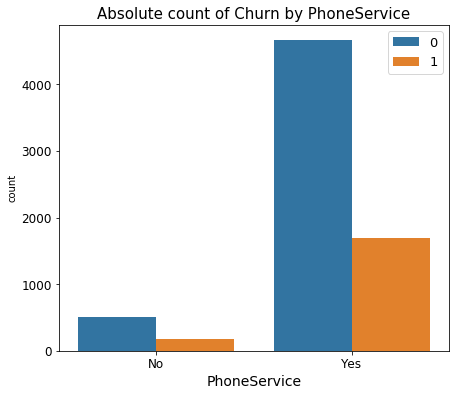

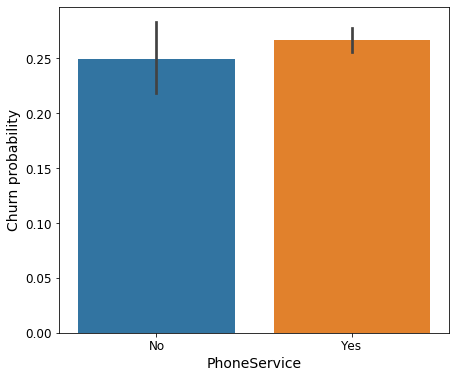

In [68]:
plotBar("PhoneService")

In [69]:
compute_chiSquare("PhoneService")

Chi-Squared Test result between PhoneService and Churn:  0.9150329892546948 0.3387825358066928 1 [[ 501.01774812  180.98225188]
 [4672.98225188 1688.01774812]]
Independent (fail to reject H0)
Independent (fail to reject H0)


**MultipleLines and Churn**

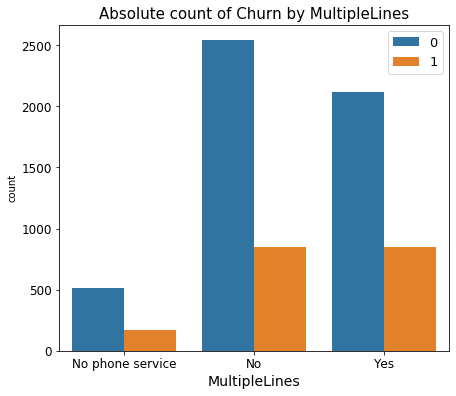

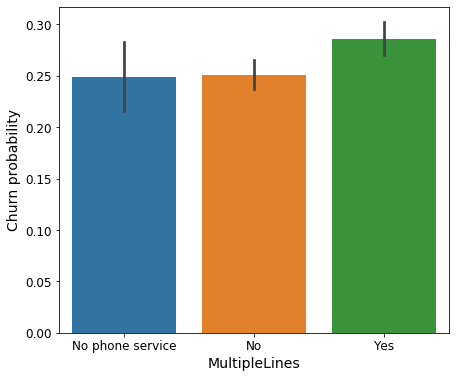

In [70]:
plotBar("MultipleLines")

In [71]:
compute_chiSquare("MultipleLines")

Chi-Squared Test result between MultipleLines and Churn:  11.33044148319756 0.0034643829548773 2 [[2490.39613801  899.60386199]
 [ 501.01774812  180.98225188]
 [2182.58611387  788.41388613]]
Dependent (reject H0)
Dependent (reject H0)


In [72]:
Bonferroni_correction("MultipleLines")

Bonferroni correction result between MultipleLines(No) and Churn: 7.323697097159075 0.006805127891593149 1 [[2683.60386199  969.39613801]
 [2490.39613801  899.60386199]]
Dependent (reject H0)

Bonferroni correction result between MultipleLines(No phone service) and Churn: 0.9150329892546947 0.3387825358066928 1 [[4672.98225188 1688.01774812]
 [ 501.01774812  180.98225188]]
Independent (fail to reject H0)

Bonferroni correction result between MultipleLines(Yes) and Churn: 11.143251001456251 0.0008433795342472428 1 [[2991.41388613 1080.58611387]
 [2182.58611387  788.41388613]]
Dependent (reject H0)



It seems that `No phone service` has the weakest association with Churn, hence it could be more siginificant for the prediction to try `MultipleLinesProcessed`

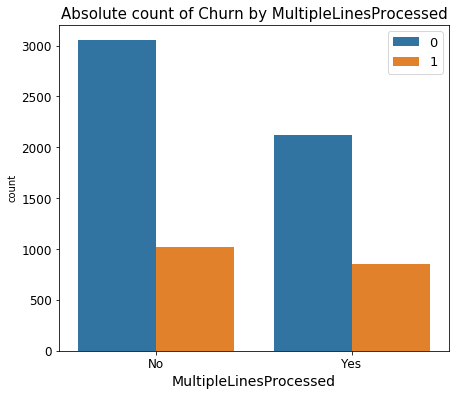

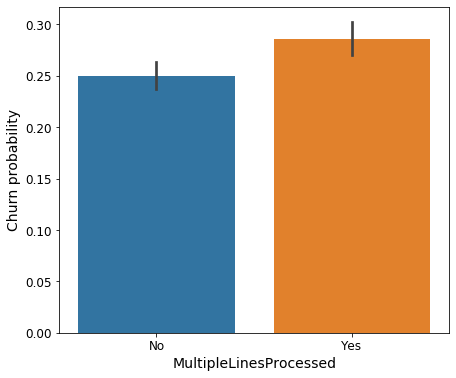

In [73]:
plotBar("MultipleLinesProcessed")

In [74]:
compute_chiSquare("MultipleLinesProcessed")

Chi-Squared Test result between MultipleLinesProcessed and Churn:  11.143251001456251 0.0008433795342472428 1 [[2991.41388613 1080.58611387]
 [2182.58611387  788.41388613]]
Dependent (reject H0)
Dependent (reject H0)


**InternetService and Churn**

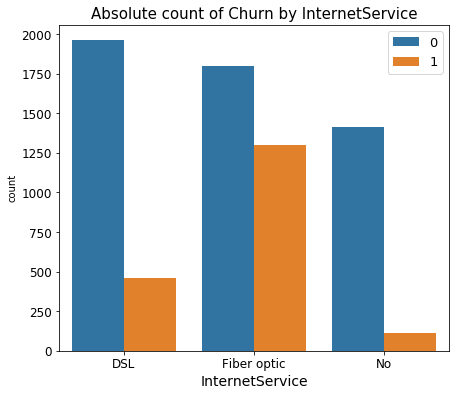

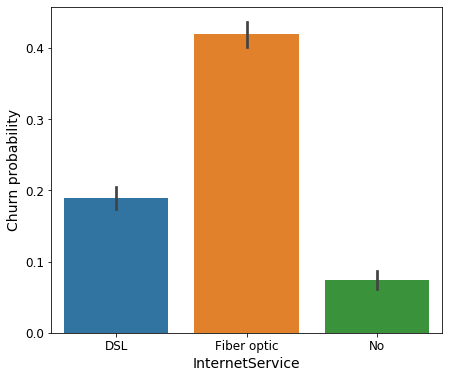

In [75]:
plotBar("InternetService")

In [76]:
compute_chiSquare("InternetService")

Chi-Squared Test result between InternetService and Churn:  732.309589667794 9.571788222840544e-160 2 [[1778.53954281  642.46045719]
 [2274.41488002  821.58511998]
 [1121.04557717  404.95442283]]
Dependent (reject H0)
Dependent (reject H0)


In [77]:
Bonferroni_correction("InternetService")

Bonferroni correction result between InternetService(DSL) and Churn: 108.07545746651793 2.587376621108007e-25 1 [[3395.46045719 1226.53954281]
 [1778.53954281  642.46045719]]
Dependent (reject H0)

Bonferroni correction result between InternetService(Fiber optic) and Churn: 666.8080208747958 4.940476033744708e-147 1 [[2899.58511998 1047.41488002]
 [2274.41488002  821.58511998]]
Dependent (reject H0)

Bonferroni correction result between InternetService(No) and Churn: 364.51979899428943 2.9203003727695145e-81 1 [[4052.95442283 1464.04557717]
 [1121.04557717  404.95442283]]
Dependent (reject H0)



Altough, Fiber optic is a faster internet, we have custumers tend to Churn more probably if they are using it.

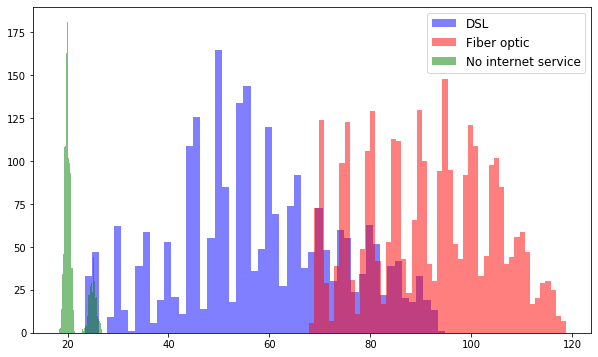

In [78]:
ax = df.loc[df["InternetService"] == "DSL", "MonthlyCharges"].hist(bins=50, color="blue", alpha=0.5, label="DSL", 
                                                    figsize=(10, 6), grid=False)
df.loc[df["InternetService"] == "Fiber optic", "MonthlyCharges"].hist(bins=50, color="red", ax=ax, alpha=0.5, 
                                                    label="Fiber optic", grid=False)
df.loc[df["InternetService"] == "No", "MonthlyCharges"].hist(
    bins=50, color="green", ax=ax, alpha=0.5, label="No internet service", grid=False)

ax.legend(fontsize=12);

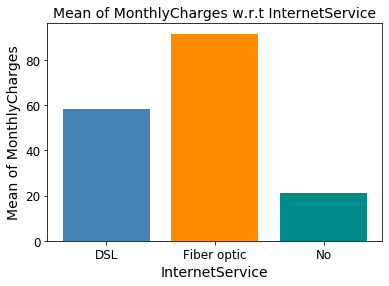

In [79]:
plotMeans("MonthlyCharges", "InternetService")

Maybe one of the reasons is because it is more expensive than DSL, while people who don't use internet have to pay much less. We can draw a conclusion that Fiber optic internet of this provider could be more expensive than same kind of internet of other providers.

**OnlineSupport and Churn**

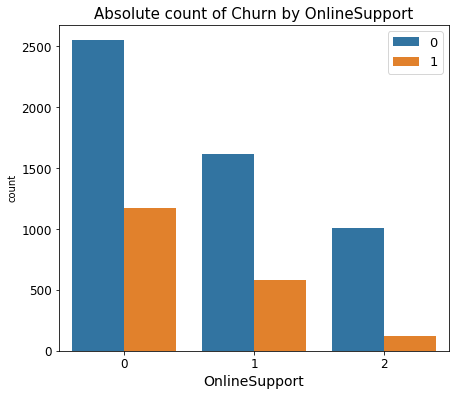

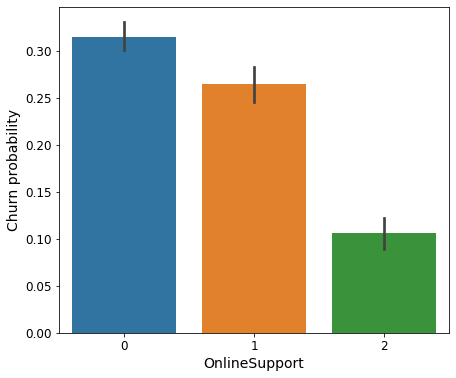

In [80]:
plotBar("OnlineSupport")

In [81]:
compute_chiSquare("OnlineSupport")

Chi-Squared Test result between OnlineSupport and Churn:  193.24406145687396 1.0903984471763722e-42 2 [[2733.55871078  987.44128922]
 [1613.24776374  582.75223626]
 [ 827.19352549  298.80647451]]
Dependent (reject H0)
Dependent (reject H0)


In [82]:
Bonferroni_correction("OnlineSupport")

Bonferroni correction result between OnlineSupport(0) and Churn: 96.87260250177505 7.393469285099063e-23 1 [[2440.44128922  881.55871078]
 [2733.55871078  987.44128922]]
Dependent (reject H0)

Bonferroni correction result between OnlineSupport(1) and Churn: 0.017217095060521423 0.8956060777875707 1 [[3560.75223626 1613.24776374]
 [1286.24776374  582.75223626]]
Independent (fail to reject H0)

Bonferroni correction result between OnlineSupport(2) and Churn: 174.33690146344946 8.356258773989686e-40 1 [[4346.80647451 1570.19352549]
 [ 827.19352549  298.80647451]]
Dependent (reject H0)



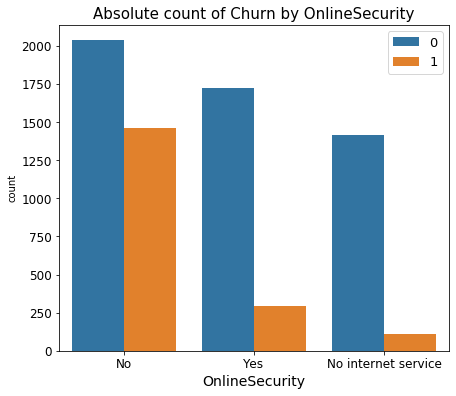

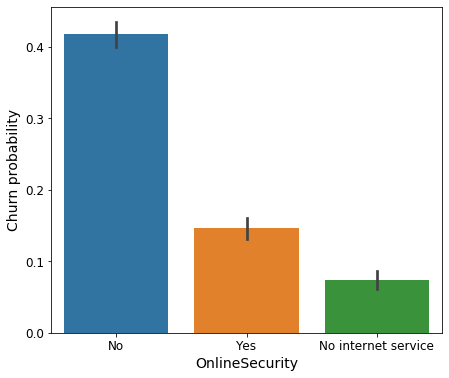

In [83]:
plotBar("OnlineSecurity")

In [84]:
compute_chiSquare("OnlineSecurity")

Chi-Squared Test result between OnlineSecurity and Churn:  849.9989679615965 2.661149635176552e-185 2 [[2569.73619196  928.26380804]
 [1121.04557717  404.95442283]
 [1483.21823087  535.78176913]]
Dependent (reject H0)
Dependent (reject H0)


In [85]:
Bonferroni_correction("OnlineSecurity")

Bonferroni correction result between OnlineSecurity(No) and Churn: 825.2966857971479 1.7069157269925669e-181 1 [[2604.26380804  940.73619196]
 [2569.73619196  928.26380804]]
Dependent (reject H0)

Bonferroni correction result between OnlineSecurity(No internet service) and Churn: 364.51979899428943 2.9203003727695145e-81 1 [[4052.95442283 1464.04557717]
 [1121.04557717  404.95442283]]
Dependent (reject H0)

Bonferroni correction result between OnlineSecurity(Yes) and Churn: 205.63310416062058 1.2320984831180024e-46 1 [[3690.78176913 1333.21823087]
 [1483.21823087  535.78176913]]
Dependent (reject H0)



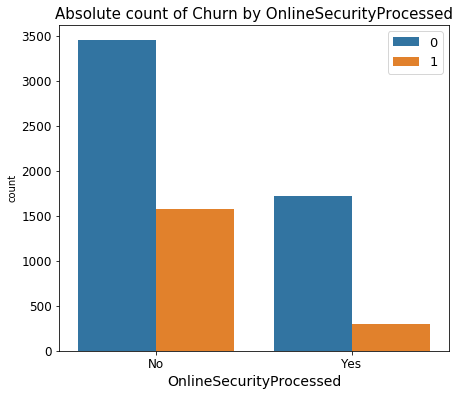

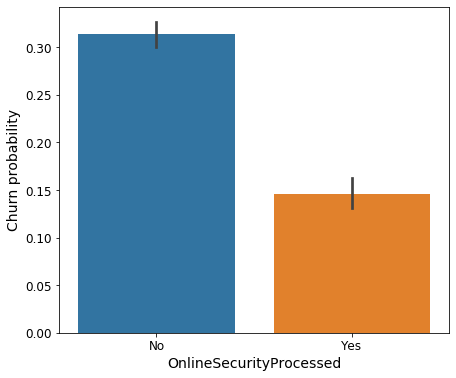

In [86]:
plotBar("OnlineSecurityProcessed")

In [87]:
compute_chiSquare("OnlineSecurityProcessed")

Chi-Squared Test result between OnlineSecurityProcessed and Churn:  205.63310416062058 1.2320984831180024e-46 1 [[3690.78176913 1333.21823087]
 [1483.21823087  535.78176913]]
Dependent (reject H0)
Dependent (reject H0)


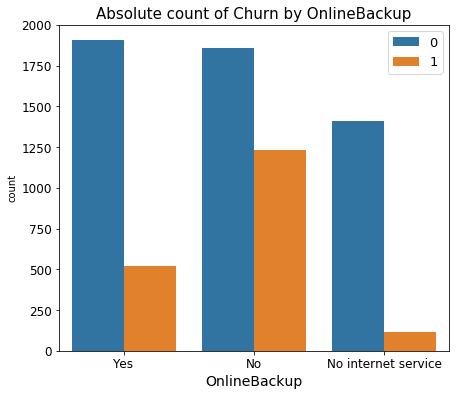

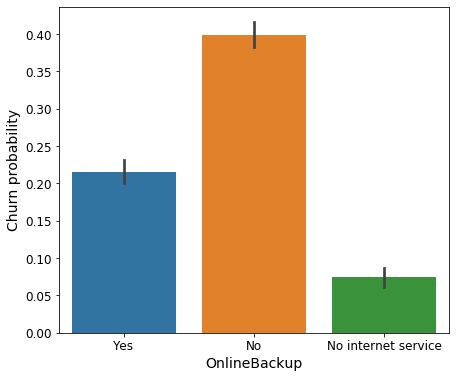

In [88]:
plotBar("OnlineBackup")

In [89]:
compute_chiSquare("OnlineBackup")

Chi-Squared Test result between OnlineBackup and Churn:  601.812790113409 2.0797592160864276e-131 2 [[2268.53783899  819.46216101]
 [1121.04557717  404.95442283]
 [1784.41658384  644.58341616]]
Dependent (reject H0)
Dependent (reject H0)


In [90]:
Bonferroni_correction("OnlineBackup")

Bonferroni correction result between OnlineBackup(No) and Churn: 504.65344181975695 9.23601344127631e-112 1 [[2905.46216101 1049.53783899]
 [2268.53783899  819.46216101]]
Dependent (reject H0)

Bonferroni correction result between OnlineBackup(No internet service) and Churn: 364.51979899428943 2.9203003727695145e-81 1 [[4052.95442283 1464.04557717]
 [1121.04557717  404.95442283]]
Dependent (reject H0)

Bonferroni correction result between OnlineBackup(Yes) and Churn: 47.260854003612764 6.214092807254819e-12 1 [[3389.58341616 1224.41658384]
 [1784.41658384  644.58341616]]
Dependent (reject H0)



We can conclude that Processed variables lower the association with Churn, and we shouldn't use them here

**DeviceProtection and Churn**

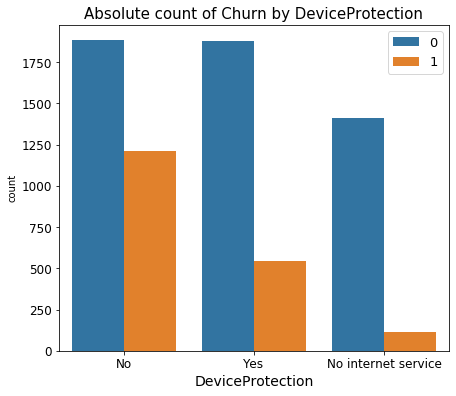

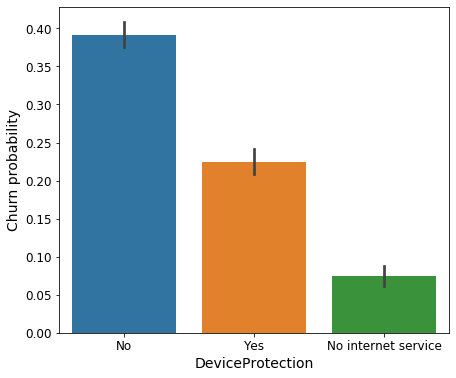

In [91]:
plotBar("DeviceProtection")

In [92]:
compute_chiSquare("DeviceProtection")

Chi-Squared Test result between DeviceProtection and Churn:  558.419369407389 5.505219496457244e-122 2 [[2273.68024989  821.31975011]
 [1121.04557717  404.95442283]
 [1779.27417294  642.72582706]]
Dependent (reject H0)
Dependent (reject H0)


In [93]:
Bonferroni_correction("DeviceProtection")

Bonferroni correction result between DeviceProtection(No) and Churn: 447.81756819369184 2.153156851028127e-99 1 [[2900.31975011 1047.68024989]
 [2273.68024989  821.31975011]]
Dependent (reject H0)

Bonferroni correction result between DeviceProtection(No internet service) and Churn: 364.51979899428943 2.9203003727695145e-81 1 [[4052.95442283 1464.04557717]
 [1121.04557717  404.95442283]]
Dependent (reject H0)

Bonferroni correction result between DeviceProtection(Yes) and Churn: 30.513394539261306 3.315693222362861e-08 1 [[3394.72582706 1226.27417294]
 [1779.27417294  642.72582706]]
Dependent (reject H0)



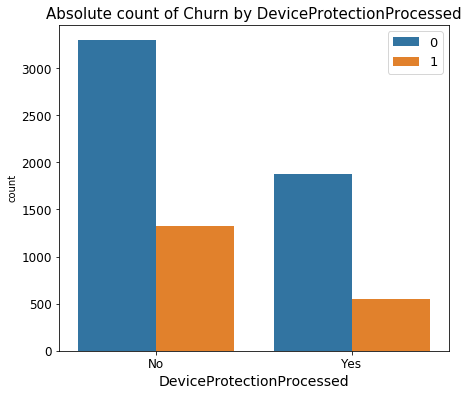

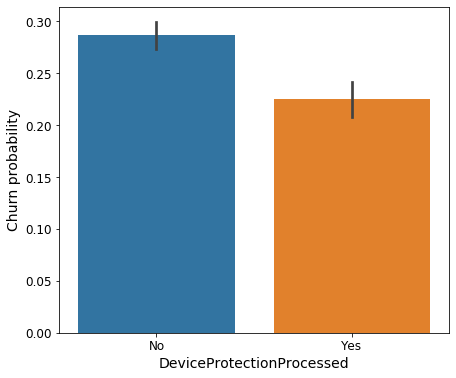

In [94]:
plotBar("DeviceProtectionProcessed")

In [95]:
compute_chiSquare("DeviceProtectionProcessed")

Chi-Squared Test result between DeviceProtectionProcessed and Churn:  30.513394539261306 3.315693222362861e-08 1 [[3394.72582706 1226.27417294]
 [1779.27417294  642.72582706]]
Dependent (reject H0)
Dependent (reject H0)


Again processed variable not useful

**TechSupport and Churn**

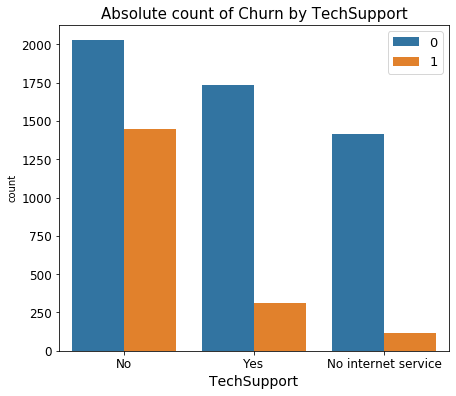

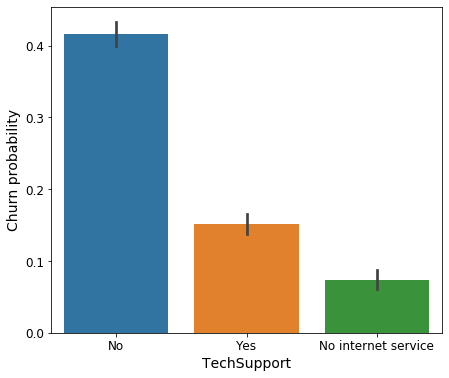

In [96]:
plotBar("TechSupport")

In [97]:
compute_chiSquare("TechSupport")

Chi-Squared Test result between TechSupport and Churn:  828.1970684587394 1.4430840279998987e-180 2 [[2551.37043873  921.62956127]
 [1121.04557717  404.95442283]
 [1501.5839841   542.4160159 ]]
Dependent (reject H0)
Dependent (reject H0)


In [98]:
Bonferroni_correction("TechSupport")

Bonferroni correction result between TechSupport(No) and Churn: 799.6724332372228 6.35740755126359e-176 1 [[2622.62956127  947.37043873]
 [2551.37043873  921.62956127]]
Dependent (reject H0)

Bonferroni correction result between TechSupport(No internet service) and Churn: 364.51979899428943 2.9203003727695145e-81 1 [[4052.95442283 1464.04557717]
 [1121.04557717  404.95442283]]
Dependent (reject H0)

Bonferroni correction result between TechSupport(Yes) and Churn: 190.16684201526067 2.9235674453140758e-43 1 [[3672.4160159 1326.5839841]
 [1501.5839841  542.4160159]]
Dependent (reject H0)



In [99]:
compute_chiSquare("TechSupportProcessed")

Chi-Squared Test result between TechSupportProcessed and Churn:  190.16684201526067 2.9235674453140758e-43 1 [[3672.4160159 1326.5839841]
 [1501.5839841  542.4160159]]
Dependent (reject H0)
Dependent (reject H0)


Processed variable not useful

**Streaming and Churn**

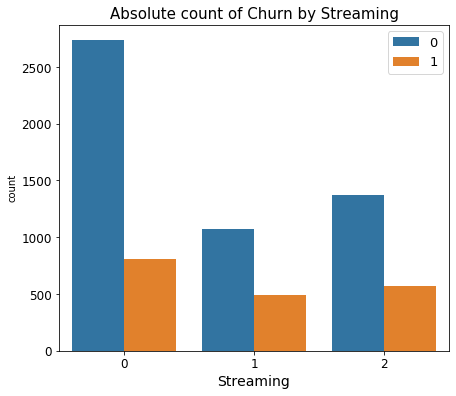

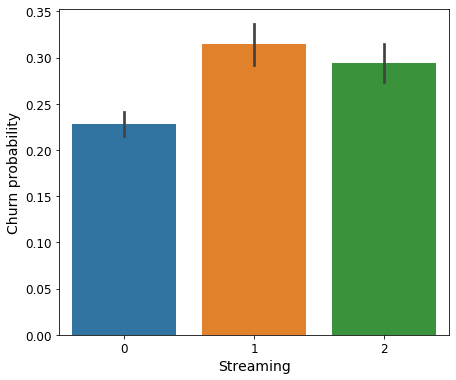

In [100]:
plotBar("Streaming")

In [101]:
compute_chiSquare("Streaming")

Chi-Squared Test result between Streaming and Churn:  52.894771262506175 3.2662269626411298e-12 2 [[2603.52917791  940.47082209]
 [1145.28837143  413.71162857]
 [1425.18245066  514.81754934]]
Dependent (reject H0)
Dependent (reject H0)


In [102]:
Bonferroni_correction("Streaming")

Bonferroni correction result between Streaming(0) and Churn: 50.740591762430526 1.0541667201283859e-12 1 [[2570.47082209  928.52917791]
 [2603.52917791  940.47082209]]
Dependent (reject H0)

Bonferroni correction result between Streaming(1) and Churn: 24.271629153122113 8.366230430945697e-07 1 [[4028.71162857 1145.28837143]
 [1455.28837143  413.71162857]]
Dependent (reject H0)

Bonferroni correction result between Streaming(2) and Churn: 11.314795862628603 0.0007689191413139545 1 [[3748.81754934 1354.18245066]
 [1425.18245066  514.81754934]]
Dependent (reject H0)



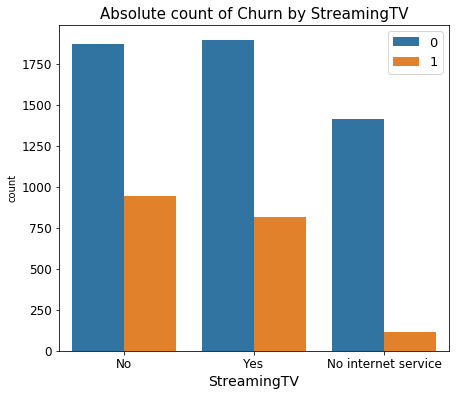

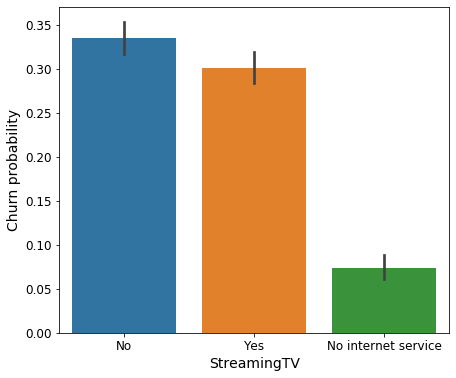

In [103]:
plotBar("StreamingTV")

In [104]:
compute_chiSquare("StreamingTV")

Chi-Squared Test result between StreamingTV and Churn:  374.2039433109813 5.528994485739183e-82 2 [[2064.31066307  745.68933693]
 [1121.04557717  404.95442283]
 [1988.64375976  718.35624024]]
Dependent (reject H0)
Dependent (reject H0)


In [105]:
Bonferroni_correction("StreamingTV")

Bonferroni correction result between StreamingTV(No) and Churn: 116.454272635564 3.779948614523097e-27 1 [[3109.68933693 1123.31066307]
 [2064.31066307  745.68933693]]
Dependent (reject H0)

Bonferroni correction result between StreamingTV(No internet service) and Churn: 364.51979899428943 2.9203003727695145e-81 1 [[4052.95442283 1464.04557717]
 [1121.04557717  404.95442283]]
Dependent (reject H0)

Bonferroni correction result between StreamingTV(Yes) and Churn: 27.862522274233417 1.3024835736732686e-07 1 [[3185.35624024 1150.64375976]
 [1988.64375976  718.35624024]]
Dependent (reject H0)



In [106]:
compute_chiSquare("StreamingTVProcessed")

Chi-Squared Test result between StreamingTVProcessed and Churn:  27.862522274233417 1.3024835736732686e-07 1 [[3185.35624024 1150.64375976]
 [1988.64375976  718.35624024]]
Dependent (reject H0)
Dependent (reject H0)


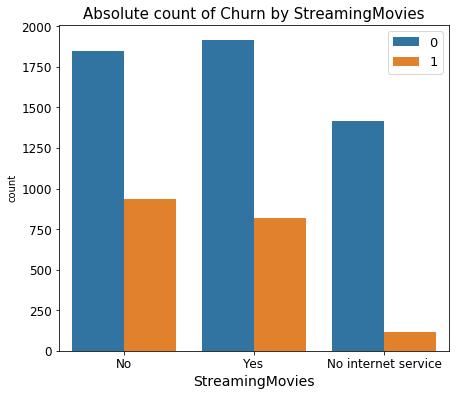

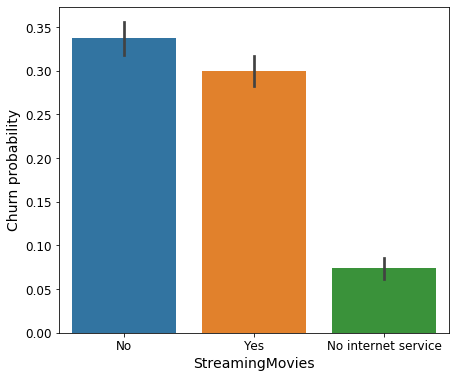

In [107]:
plotBar("StreamingMovies")

In [108]:
compute_chiSquare("StreamingMovies")

Chi-Squared Test result between StreamingMovies and Churn:  375.6614793452656 2.667756755723681e-82 2 [[2045.94490984  739.05509016]
 [1121.04557717  404.95442283]
 [2007.00951299  724.99048701]]
Dependent (reject H0)
Dependent (reject H0)


In [109]:
Bonferroni_correction("StreamingMovies")

Bonferroni correction result between StreamingMovies(No) and Churn: 119.9737987086716 6.410177726535232e-28 1 [[3128.05509016 1129.94490984]
 [2045.94490984  739.05509016]]
Dependent (reject H0)

Bonferroni correction result between StreamingMovies(No internet service) and Churn: 364.51979899428943 2.9203003727695145e-81 1 [[4052.95442283 1464.04557717]
 [1121.04557717  404.95442283]]
Dependent (reject H0)

Bonferroni correction result between StreamingMovies(Yes) and Churn: 26.25133601003847 2.9974738476267514e-07 1 [[3166.99048701 1144.00951299]
 [2007.00951299  724.99048701]]
Dependent (reject H0)



In [110]:
compute_chiSquare("StreamingMoviesProcessed")

Chi-Squared Test result between StreamingMoviesProcessed and Churn:  26.25133601003847 2.9974738476267514e-07 1 [[3166.99048701 1144.00951299]
 [2007.00951299  724.99048701]]
Dependent (reject H0)
Dependent (reject H0)


Again, using processed variables in prediction will just lower our result

**Contract and Churn**

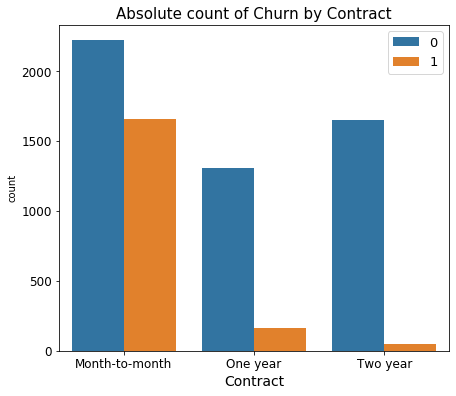

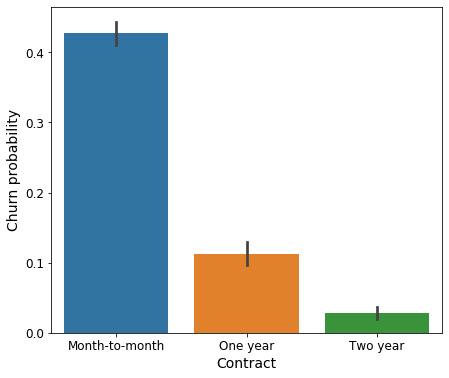

In [111]:
plotBar("Contract")

In [112]:
compute_chiSquare("Contract")

Chi-Squared Test result between Contract and Churn:  1184.5965720837926 5.863038300673391e-258 2 [[2846.69175067 1028.30824933]
 [1082.11018032  390.88981968]
 [1245.198069    449.801931  ]]
Dependent (reject H0)
Dependent (reject H0)


In [113]:
Bonferroni_correction("Contract")

Bonferroni correction result between Contract(Month-to-month) and Churn: 1153.9716611093477 6.147585925549194e-253 1 [[2327.30824933  840.69175067]
 [2846.69175067 1028.30824933]]
Dependent (reject H0)

Bonferroni correction result between Contract(One year) and Churn: 221.71021164175067 3.8313271533892435e-50 1 [[4091.88981968 1478.11018032]
 [1082.11018032  390.88981968]]
Dependent (reject H0)

Bonferroni correction result between Contract(Two year) and Churn: 641.8281150143744 1.3376802517066984e-141 1 [[3928.801931 1419.198069]
 [1245.198069  449.801931]]
Dependent (reject H0)



**PaperlessBilling and Churn**

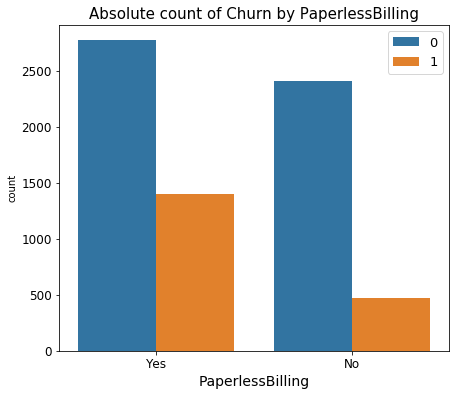

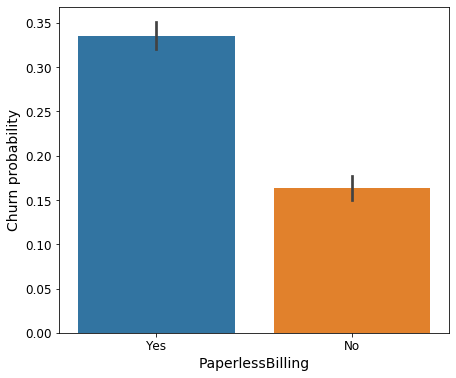

In [114]:
plotBar("PaperlessBilling")

In [115]:
compute_chiSquare("PaperlessBilling")

Chi-Squared Test result between PaperlessBilling and Churn:  258.27764906707307 4.073354668665985e-58 1 [[2109.85773108  762.14226892]
 [3064.14226892 1106.85773108]]
Dependent (reject H0)
Dependent (reject H0)


**PaymentMethod and Churn**

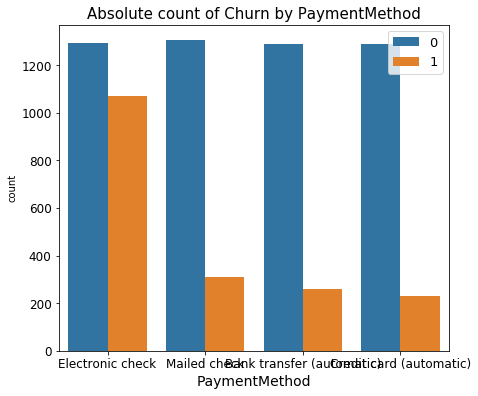

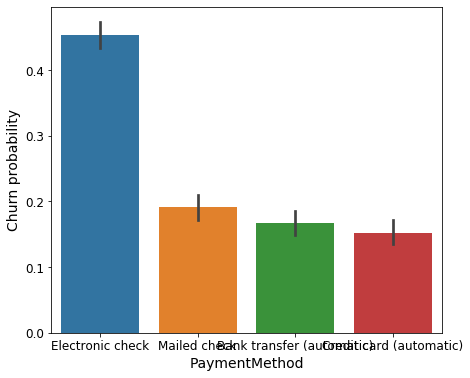

In [116]:
plotBar("PaymentMethod")

In [117]:
compute_chiSquare("PaymentMethod")

Chi-Squared Test result between PaymentMethod and Churn:  648.1423274814 3.6823546520097993e-140 3 [[1134.26891949  409.73108051]
 [1118.10705665  403.89294335]
 [1737.40025557  627.59974443]
 [1184.22376828  427.77623172]]
Dependent (reject H0)
Dependent (reject H0)


In [118]:
Bonferroni_correction("PaymentMethod")

Bonferroni correction result between PaymentMethod(Bank transfer (automatic)) and Churn: 97.31693758886718 5.907284536907499e-23 1 [[4039.73108051 1459.26891949]
 [1134.26891949  409.73108051]]
Dependent (reject H0)

Bonferroni correction result between PaymentMethod(Credit card (automatic)) and Churn: 126.2963541852161 2.6482968066160827e-29 1 [[4055.89294335 1465.10705665]
 [1118.10705665  403.89294335]]
Dependent (reject H0)

Bonferroni correction result between PaymentMethod(Electronic check) and Churn: 640.557084271473 2.5280301640753998e-141 1 [[3436.59974443 1241.40025557]
 [1737.40025557  627.59974443]]
Dependent (reject H0)

Bonferroni correction result between PaymentMethod(Mailed check) and Churn: 58.708410095628814 1.828582177602814e-14 1 [[3989.77623172 1441.22376828]
 [1184.22376828  427.77623172]]
Dependent (reject H0)



Let us summarize a correlation of `Churn` with other variables

In [119]:
df_tmp = df.copy()
df_tmp.drop(columns = ["customerID"], inplace = True, axis = 1)
df_dummies = pd.get_dummies(df_tmp)
df_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Streaming,OnlineSupport,gender_Female,gender_Male,Partner_No,...,OnlineBackupProcessed_No,OnlineBackupProcessed_Yes,DeviceProtectionProcessed_No,DeviceProtectionProcessed_Yes,TechSupportProcessed_No,TechSupportProcessed_Yes,StreamingTVProcessed_No,StreamingTVProcessed_Yes,StreamingMoviesProcessed_No,StreamingMoviesProcessed_Yes
0,0,1,29.85,29.85,0,0,1,1,0,0,...,0,1,1,0,1,0,1,0,1,0
1,0,34,56.95,1889.50,0,0,1,0,1,1,...,1,0,0,1,1,0,1,0,1,0
2,0,2,53.85,108.15,1,0,2,0,1,1,...,0,1,1,0,1,0,1,0,1,0
3,0,45,42.30,1840.75,0,0,1,0,1,1,...,1,0,0,1,0,1,1,0,1,0
4,0,2,70.70,151.65,1,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,2,1,0,1,0,...,1,0,0,1,0,1,0,1,0,1
7039,0,72,103.20,7362.90,0,2,1,1,0,0,...,0,1,0,1,1,0,0,1,0,1
7040,0,11,29.60,346.45,0,0,1,1,0,0,...,1,0,1,0,1,0,1,0,1,0
7041,1,4,74.40,306.60,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0


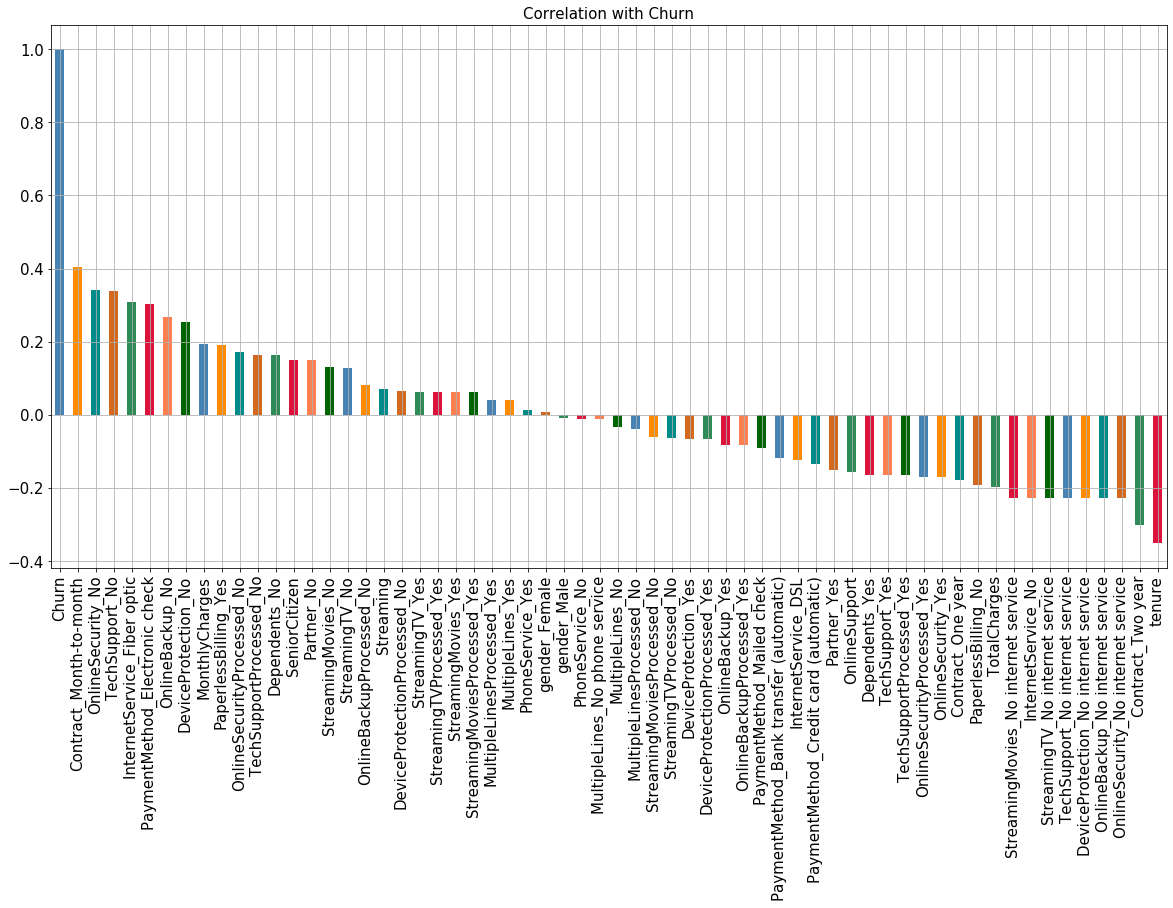

In [120]:
plt.figure(figsize=(20, 10))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', grid="True", fontsize=15, color=[
    'SteelBlue', 'DarkOrange', 'DarkCyan', 'Chocolate', 'SeaGreen', 'Crimson', 'Coral', 'DarkGreen'])
plt.title("Correlation with Churn", fontsize=15)
plt.show()

Now we want to try without low correlated variables

In [121]:
df_tmp = df.copy()
# my suggestion which variables shoul we drop at DataTransformation
df_tmp.drop(columns = ["customerID", "OnlineSecurityProcessed", "OnlineBackupProcessed",
                      "DeviceProtectionProcessed", "TechSupportProcessed", "StreamingTVProcessed",
                      "StreamingMoviesProcessed", "Streaming", "OnlineSupport", "PhoneService",
                      "gender", "MultipleLines", "MultipleLinesProcessed"], inplace = True, axis = 1)
df_dummies = pd.get_dummies(df_tmp)
df_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,0,1,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1


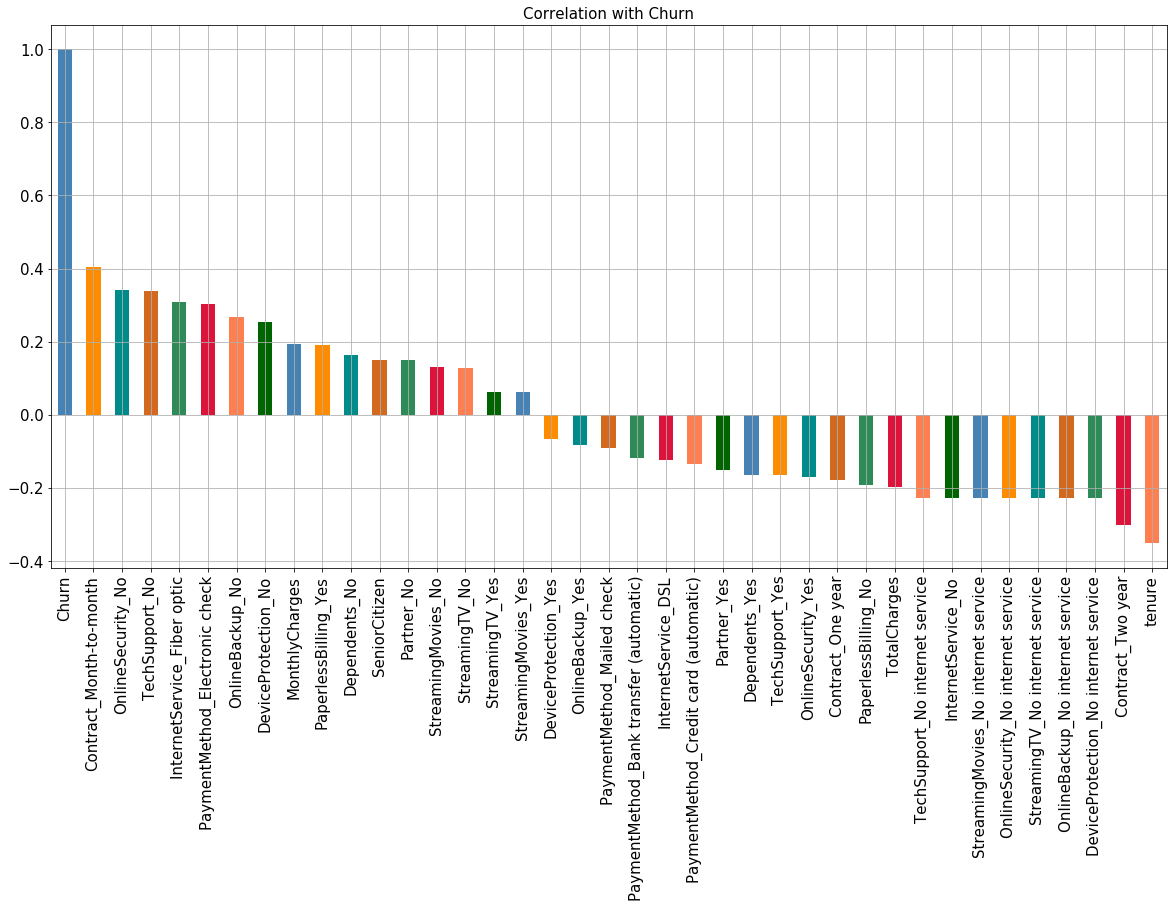

In [122]:
plt.figure(figsize=(20, 10))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', grid="True", fontsize=15, color=[
    'SteelBlue', 'DarkOrange', 'DarkCyan', 'Chocolate', 'SeaGreen', 'Crimson', 'Coral', 'DarkGreen'])
plt.title("Correlation with Churn", fontsize=15)
plt.show()